imports

In [1]:
%matplotlib inline
import statsmodels as sm
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import scipy.stats as stats
sns.set(style="white")

## Getting and exploring the data

In [2]:
immer_ds = sm.datasets.get_rdataset("immer", "MASS")

In [3]:
immer_data = immer_ds.data
immer_ds.data

,Loc,Var,Y1,Y2
0,UF,M,81.0,80.7
1,UF,S,105.4,82.3
2,UF,V,119.7,80.4
3,UF,T,109.7,87.2
4,UF,P,98.3,84.2
5,W,M,146.6,100.4
6,W,S,142.0,115.5
7,W,V,150.7,112.2
8,W,T,191.5,147.7
9,W,P,145.7,108.1


In [4]:
immer_data.describe()

,Y1,Y2
count,30.000000,30.000000
mean,109.046667,93.133333
std,28.674279,24.275450
min,69.100000,49.900000
25%,87.425000,76.850000
50%,102.950000,92.950000
75%,124.600000,107.350000
max,191.500000,147.700000


## Two sample t test - are two distributions different?

Is manchuria yielding more crop than trebi?

In [5]:
manchuria_yield = immer_data.Y1[immer_data.Var == "M"]
trebi_yield = immer_data.Y1[immer_data.Var == "T"]

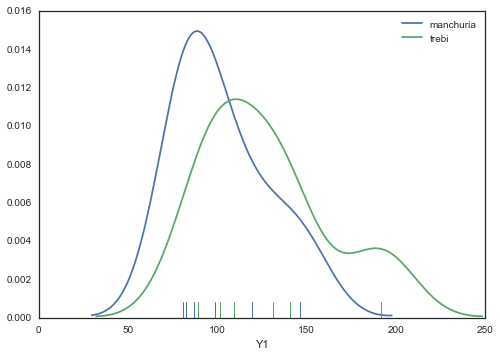

In [6]:
sns.distplot(manchuria_yield, rug=True, hist=False, label="manchuria")
sns.distplot(trebi_yield, rug=True, hist=False, label="trebi")

In [7]:
t, p = stats.ttest_ind(manchuria_yield, trebi_yield)
print t, p

-1.352886893 0.205886131092


How does it work?

$$t = \frac{\bar {X}_1 - \bar{X}_2}{s_{X_1X_2} \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

where $s_{X_1X_2}$ the the common variance

$$ s_{X_1X_2} = \sqrt{\frac{(n_1-1)s_{X_1}^2+(n_2-1)s_{X_2}^2}{n_1+n_2-2}}$$

What does it really mean? Further away the means are the higher the statistic gets

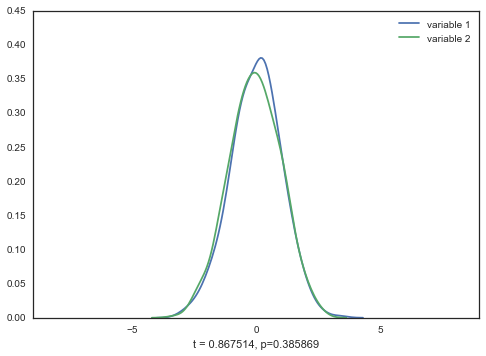

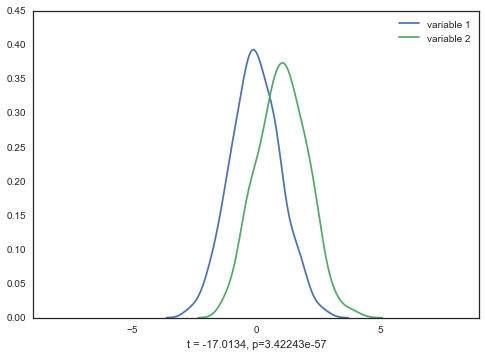

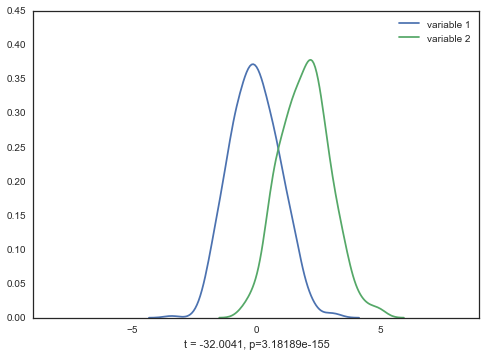

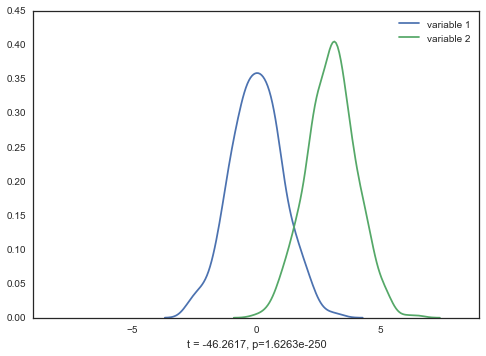

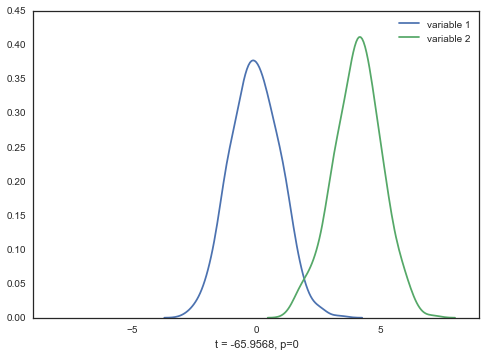

In [8]:
for rv2_mean in range(0,5,1):
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=500)
    rvs2 = stats.norm.rvs(loc=rv2_mean,scale=1,size=500)
    stats.ttest_ind(rvs1,rvs2)
    f = plt.figure()
    sns.distplot(rvs1, hist=False, label="variable 1")
    sns.distplot(rvs2, hist=False, label="variable 2", axlabel="t = %g, p=%g"%stats.ttest_ind(rvs1,rvs2))
    plt.xlim([-9,9])
    plt.ylim([0, 0.45])

In general the less there is an overlap between the two distributions the higher the statistic

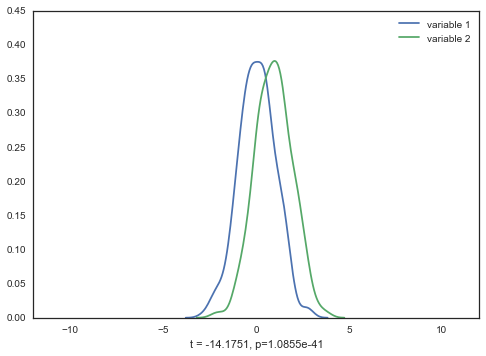

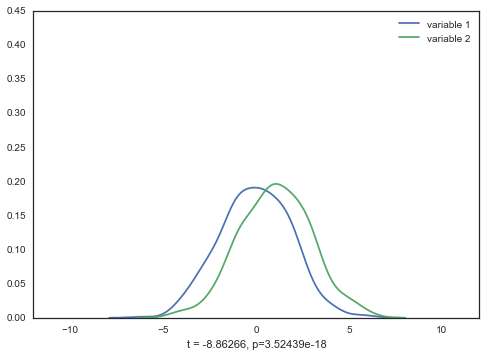

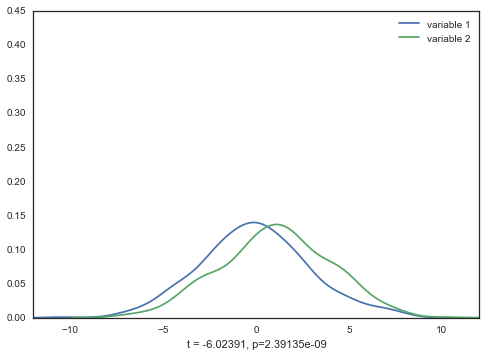

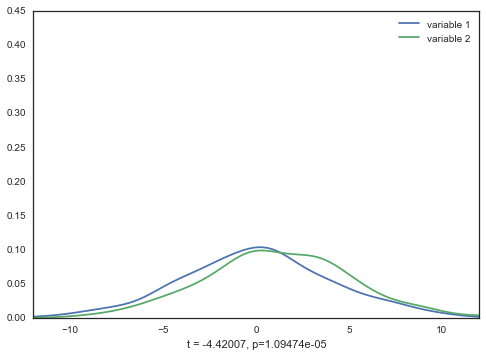

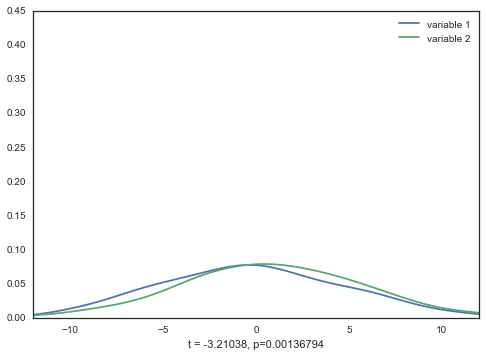

In [9]:
for rvs_spread in range(1,6,1):
    rvs1 = stats.norm.rvs(loc=0,scale=rvs_spread,size=500)
    rvs2 = stats.norm.rvs(loc=1,scale=rvs_spread,size=500)
    stats.ttest_ind(rvs1,rvs2)
    plt.figure()
    sns.distplot(rvs1, hist=False, label="variable 1")
    sns.distplot(rvs2, hist=False, label="variable 2", axlabel="t = %g, p=%g"%stats.ttest_ind(rvs1,rvs2))
    plt.xlim([-12,12])
    plt.ylim([0, 0.45])

The higher the sample size the higher the statistic.

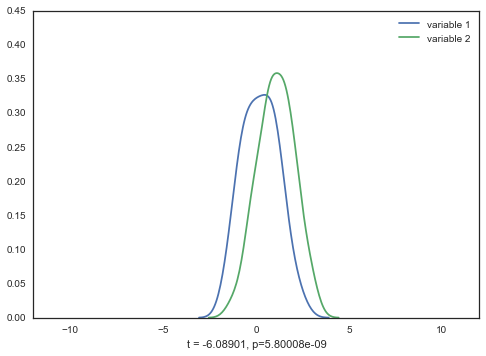

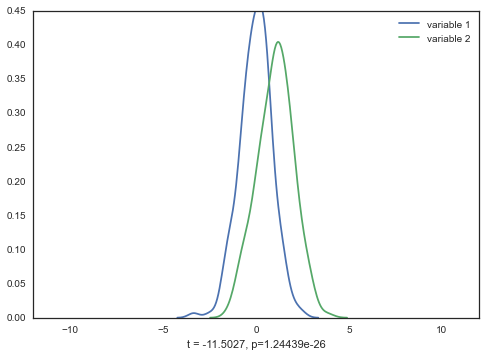

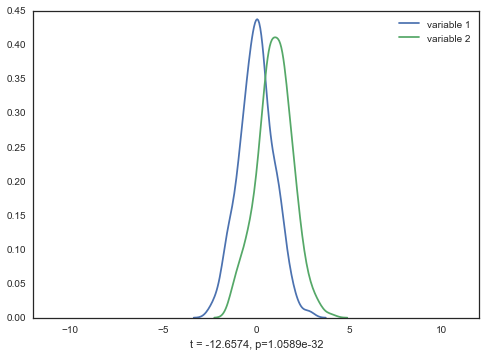

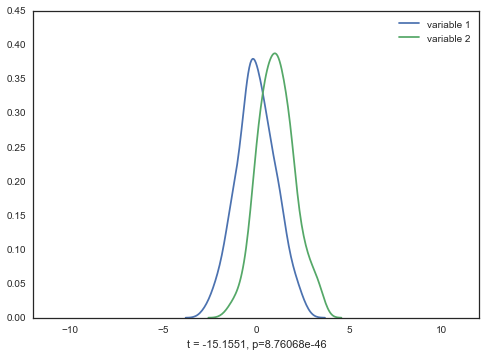

In [10]:
for sample_size in range(100,500,100):
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=sample_size)
    rvs2 = stats.norm.rvs(loc=1,scale=1,size=sample_size)
    stats.ttest_ind(rvs1,rvs2)
    plt.figure()
    sns.distplot(rvs1, hist=False, label="variable 1")
    sns.distplot(rvs2, hist=False, label="variable 2", axlabel="t = %g, p=%g"%stats.ttest_ind(rvs1,rvs2))
    plt.xlim([-12,12])
    plt.ylim([0, 0.45])

Sample size not only increases the statistic, but also increases degrees of freedom which are used for calculating the p value.

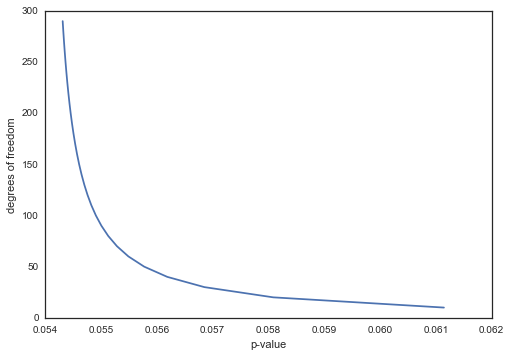

In [11]:
dfs = range(10,300, 10)
ps = [stats.t.pdf(2, df) for df in dfs]
plt.plot(ps, dfs)
plt.xlabel("p-value")
plt.ylabel("degrees of freedom")

Even tiniest effect size can be statistically significant if you collect enough samples.

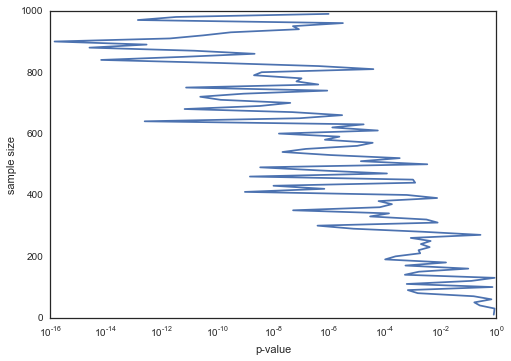

In [12]:
sample_sizes = range(10, 1000, 10)
ps = [stats.ttest_ind(stats.norm.rvs(loc=0,scale=1,size=sample_size),
                      stats.norm.rvs(loc=0.3,scale=1,size=sample_size))[1] for sample_size in sample_sizes]
plt.semilogx(ps, sample_sizes)
plt.xlabel("p-value")
plt.ylabel("sample size")

## Paired T test

In [13]:
year1_yield = immer_data.Y1
year2_yield = immer_data.Y2

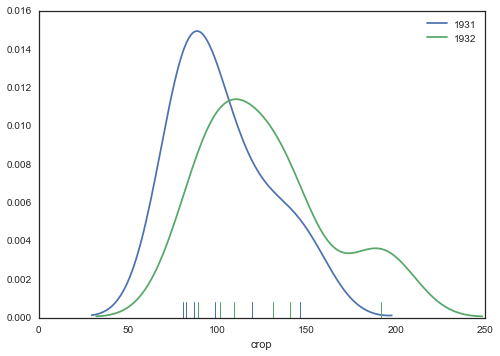

In [14]:
sns.distplot(manchuria_yield, rug=True, hist=False, label="1931")
sns.distplot(trebi_yield, rug=True, hist=False, label="1932")
plt.xlabel("crop")

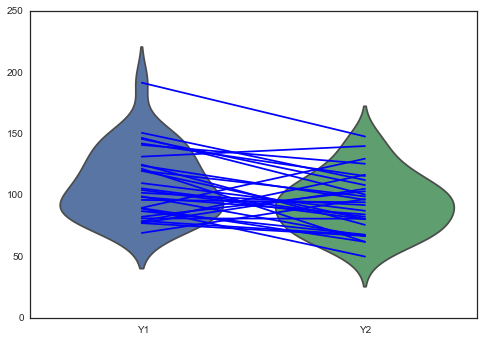

In [15]:
sns.violinplot(inner=None, data=immer_data)
for y1, y2 in zip(year1_yield, year2_yield):
    plt.plot([0,1], [y1,y2], color="b")

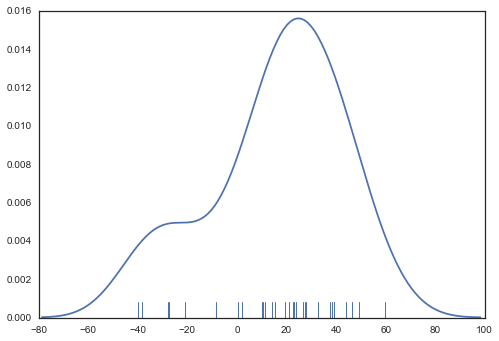

In [16]:
y_diff = year1_yield-year2_yield
sns.distplot(y_diff,  rug=True, hist=False)

Let's calculate a one sample t-test checking if the distribution of differences is significantly different from zero.

In [17]:
stats.ttest_1samp(y_diff, 0)

Ttest_1sampResult(statistic=3.3239873042716788, pvalue=0.0024126338636167597)

This is equivalent to so called paired two sample t test

In [18]:
stats.ttest_rel(year1_yield,year2_yield)

Ttest_relResult(statistic=3.3239873042716788, pvalue=0.0024126338636167597)

What would happen if we ignored the pairing and treat the samples as independent?

In [19]:
stats.ttest_ind(year1_yield,year2_yield)

Ttest_indResult(statistic=2.3199548629875282, pvalue=0.023883598700006337)

The result is similar, but would it always be the case? Let's generate a lot of data and compare the difference between two sample independent and paired tests.

In [20]:
t_diffs = []
rvs = []
for i in range(1000):
    rvs1 = stats.norm.rvs(loc=0,scale=1,size=15)
    rvs2 = stats.norm.rvs(loc=0.2,scale=1,size=15)
    t_rel, _ = stats.ttest_rel(rvs1,rvs2)
    t_ind, _ = stats.ttest_ind(rvs1,rvs2)
    t_diff = t_rel - t_ind
    t_diffs.append(t_diff)
    rvs.append((rvs1, rvs2))

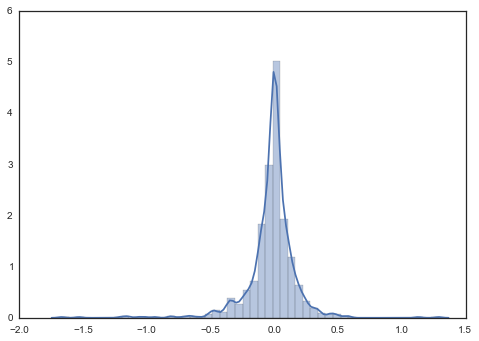

In [21]:
sns.distplot(t_diffs)

Note that the distribution is left skewed. This means that independent samples t test has more often higher values than the paired version.

Let's pick and extreme

In [22]:
rv1, rv2 = rvs[np.array(t_diffs).argmax()]

/Users/poldrack/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


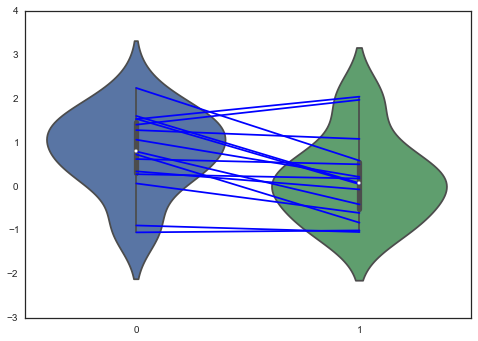

In [23]:
sns.violinplot(pd.DataFrame(np.array([rv1, rv2]).T))
for y1, y2 in zip(rv1, rv2):
    plt.plot([0,1], [y1,y2], color="b")

In [24]:
stats.ttest_rel(rv1, rv2)

Ttest_relResult(statistic=3.007353741769633, pvalue=0.0094132898015703848)

In [25]:
stats.ttest_ind(rv1, rv2)

Ttest_indResult(statistic=1.7195355745906917, pvalue=0.096554489785693809)

Using the wrong test can result in a test being less or more significant than it should. However the sign of the stattistic can never change.

## Correlation between values

Are the yields of barley crops in 1931 correlated with yields in 1932

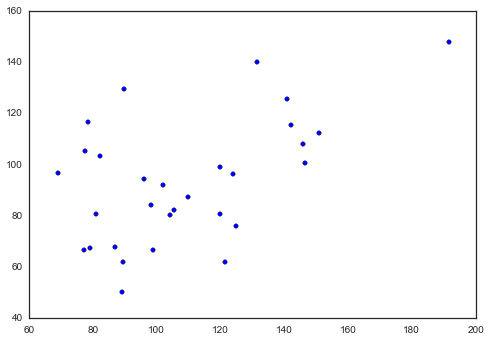

In [26]:
plt.scatter(x=year1_yield, y=year2_yield)

We can try to fit a line to this plot. A line is defined by the following equation:
$$ y = ax + b $$
where $a$ the slope and $b$ is the intercept of the line.

In [27]:
slope, intercept, r_value, p_value, std_err = stats.linregress(year1_yield, year2_yield)

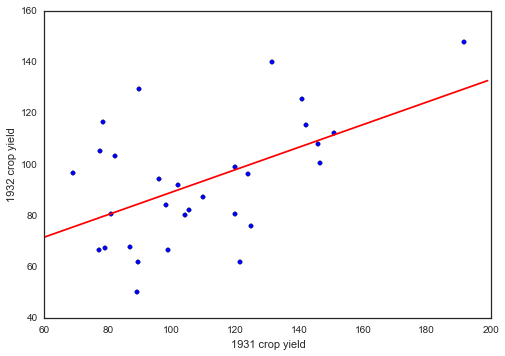

In [28]:
plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(60,200),intercept+slope*np.arange(60,200), color="r")
plt.xlim([60, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")

From the equation we can see that the intercept is equivalent to the crop yield in 1932 (y) in case the yield in 1931 (x) was zero:
$$ y = a0 + b = b$$

45.1275605247


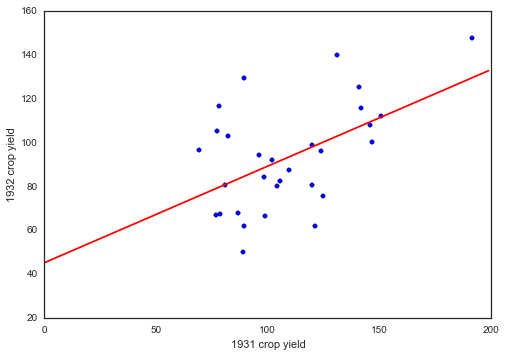

In [29]:
plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(0,200),intercept+slope*np.arange(0,200), color="r")
plt.xlim([0, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")
print intercept

How is this line fitted? The line is a prediction. It tells you what should be the crop yield in 1932 based on 1931. But it's not perfect. Let's draw how far the predictions are from reality.

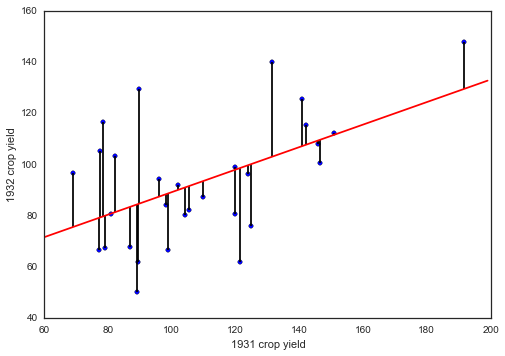

In [30]:
plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(60,200),intercept+slope*np.arange(60,200), color="r")
plt.xlim([60, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")
plt.vlines(year1_yield, year2_yield,intercept+slope*year1_yield)

We can count the errors

In [31]:
print np.abs(year2_yield-intercept+slope*year1_yield).sum()

2880.34636852


Different lines will have bigger different errors:

3671.05636852


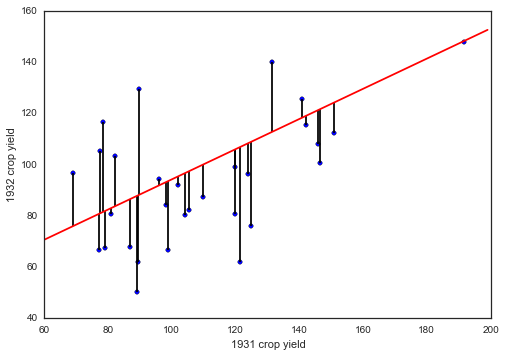

In [32]:
slope2 = slope + 0.15
intercept2 = intercept - 10

plt.scatter(x=year1_yield, y=year2_yield)
plt.plot(np.arange(60,200),intercept2+slope2*np.arange(60,200), color="r")
plt.xlim([60, 200])
plt.xlabel("1931 crop yield")
plt.ylabel("1932 crop yield")
plt.vlines(year1_yield, year2_yield,intercept2+slope2*year1_yield)
print np.abs(year2_yield-intercept2+slope2*year1_yield).sum()

The fitting procedure is minimizing those errors trying to find a line that best describes the data.

In practice sum of absolute values of errors is not minimized - it's the sum of squares

In [33]:
print ((year2_yield-intercept2+slope2*year1_yield)**2).sum()

487009.427745


In [34]:
((year2_yield-intercept2+slope2*year1_yield)**2).sum()

487009.42774532107

In practice this means that big errors will make much bigger impact on the fit than small errors.

Why square not absolute value? This comes from the fact that linear regression model is using Gaussian random noise.

$$ y = ax + b + \epsilon$$
where $\epsilon = N(0,1)$ (is a Gaussina with mean zero and variance 1)

Note that fitting a linear model has a close solution. This means that we can calculate optimal slope and intercept parameters without having to try multiple different lines.

To assess how well we can predict values of one variable with the values of another we can use the correlation value

In [35]:
r_value

0.52000353342794492

Correlation is nothing else than covariance of the two variables normalized by their variance. It varies from -1 (anticorrealted), through 0 (uncorrelated), to 1 (fully correlated)

$$P_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }$$

In [36]:
np.corrcoef(x=year1_yield, y=year2_yield)

array([[ 1.        ,  0.52000353],
       [ 0.52000353,  1.        ]])

Correlation coefficient has another interesting property - when squared it describes the percentage of variance of variable Y explained by one varaince in variable X (and vice versa) 

In [37]:
r_value**2*100

27.040367477754785

There is also a p-value. It is directly related to the r_value and the number of samples.

## Multiple linear regression

In [38]:
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data

In [39]:
ds = sm.datasets.get_rdataset("Duncan", "car", cache=True)
print ds.__doc__

+----------+-------------------+
| Duncan   | R Documentation   |
+----------+-------------------+

Duncan's Occupational Prestige Data
-----------------------------------

Description
~~~~~~~~~~~

The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
prestige and other characteristics of 45 U. S. occupations in 1950.

Usage
~~~~~

::

    Duncan

Format
~~~~~~

This data frame contains the following columns:

type
    Type of occupation. A factor with the following levels: ``prof``,
    professional and managerial; ``wc``, white-collar; ``bc``,
    blue-collar.

income
    Percent of males in occupation earning $3500 or more in 1950.

education
    Percent of males in occupation in 1950 who were high-school
    graduates.

prestige
    Percent of raters in NORC study rating occupation as excellent or
    good in prestige.

Source
~~~~~~

Duncan, O. D. (1961) A socioeconomic index for all occupations. In
Reiss, A. J., Jr. (Ed.) *Occupations and Social Status.* Free Press
[Ta

In [40]:
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


How well can we describe predict prestige using education and icome?

In [41]:
prestige_model = ols("prestige ~ income + education", data=prestige).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 16 Aug 2015   Prob (F-statistic):           8.65e-17
Time:                        12:34:53   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

Multiple linear regression (or General Linear Models - GLM) are based on the premise of a matrix of variables describing the data:
$$ Y = \beta X + \epsilon $$
where $\beta$ are the coefficient and X is the design matrix. In our case the design matrix looks this way

<matplotlib.colorbar.Colorbar instance at 0x1037c8638>

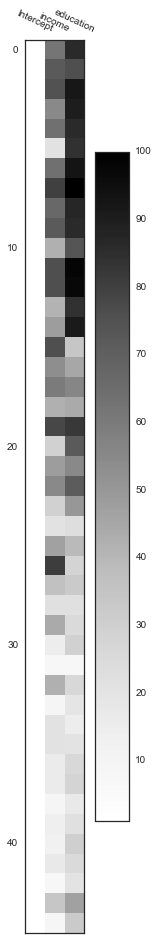

In [42]:
plt.matshow(prestige_model.model.exog)
plt.xticks(range(3), prestige_model.model.exog_names, rotation=-25)
plt.colorbar()

Note that on top of our two regressors of interest ("income" and "education") we also have "intercept" just like in regural linear regrossion with one variable.

In fact we can recreate the same results from our previous example using GLM.

In [43]:
crop_model = ols("Y2 ~ Y1", data=immer_ds.data).fit()
print(crop_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     10.38
Date:                Sun, 16 Aug 2015   Prob (F-statistic):            0.00323
Time:                        12:34:53   Log-Likelihood:                -133.01
No. Observations:                  30   AIC:                             270.0
Df Residuals:                      28   BIC:                             272.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.1276     15.392      2.932      0.0

<matplotlib.colorbar.Colorbar instance at 0x109377290>

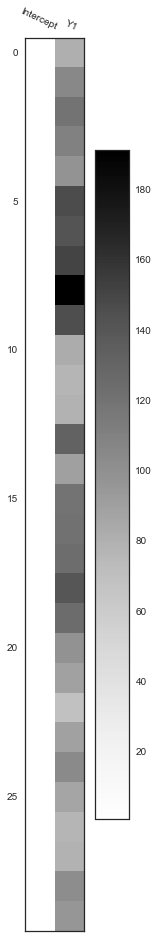

In [44]:
plt.matshow(crop_model.model.exog)
plt.xticks(range(2), crop_model.model.exog_names, rotation=-25)
plt.colorbar()

You can also express two sample T test in GLM

In [45]:
immer_subset = immer_data[np.logical_or(immer_data.Var == "M", immer_data.Var == "T")]

In [46]:
subset_model = ols("Y1 ~ Var", data=immer_subset).fit()
print(subset_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.830
Date:                Sun, 16 Aug 2015   Prob (F-statistic):              0.206
Time:                        12:34:54   Log-Likelihood:                -57.436
No. Observations:                  12   AIC:                             118.9
Df Residuals:                      10   BIC:                             119.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    102.5833     12.971      7.909      0.0

/Users/poldrack/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<matplotlib.colorbar.Colorbar instance at 0x10e3796c8>

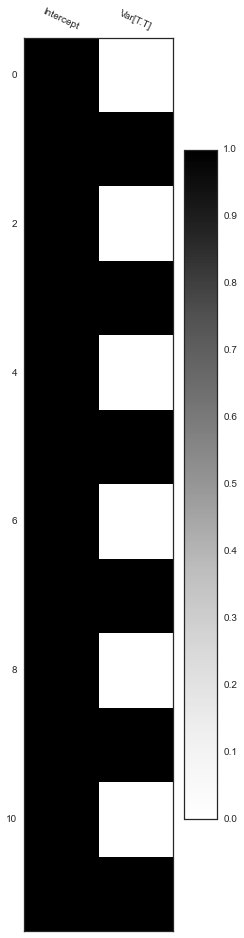

In [47]:
plt.matshow(subset_model.model.exog)
plt.xticks(range(2), subset_model.model.exog_names, rotation=-25)
plt.colorbar()

This model can be also used for more than two "groups"

In [48]:
full_model = ols("Y1 ~ Var", data=immer_ds.data).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.8170
Date:                Sun, 16 Aug 2015   Prob (F-statistic):              0.526
Time:                        12:34:54   Log-Likelihood:                -140.90
No. Observations:                  30   AIC:                             291.8
Df Residuals:                      25   BIC:                             298.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    102.5833     11.857      8.652      0.0

<matplotlib.colorbar.Colorbar instance at 0x10b95dd88>

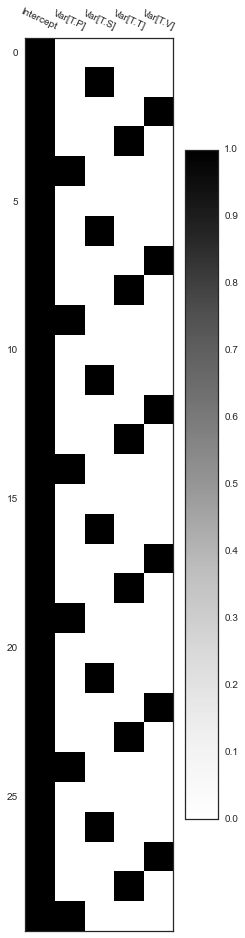

In [49]:
plt.matshow(full_model.model.exog)
plt.xticks(range(len(full_model.model.exog_names)), full_model.model.exog_names, rotation=-25)
plt.colorbar()

We can now explicitly test hypotheses such as is there a difference between manchuria and trebi.

In [50]:
full_model.f_test("Var[T.P] = Var[T.T]")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 1.10795911]]), p=0.302594070459, df_denom=25, df_num=1>

Which is equivalent to

In [51]:
full_model.f_test([1,0,0,0,0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 74.85450171]]), p=5.47180327644e-09, df_denom=25, df_num=1>

There are also other ways of coding categorical variables in design matrices

## Shared variance and colinearity

In [52]:
data = sm.datasets.longley.load_pandas().data
data.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323,83.0,234289,2356,1590,107608,1947
1,61122,88.5,259426,2325,1456,108632,1948
2,60171,88.2,258054,3682,1616,109773,1949
3,61187,89.5,284599,3351,1650,110929,1950
4,63221,96.2,328975,2099,3099,112075,1951


In [53]:
print sm.datasets.longley.NOTE

::

    Number of Observations - 16

    Number of Variables - 6

    Variable name definitions::

            TOTEMP - Total Employment
            GNPDEFL - GNP deflator
            GNP - GNP
            UNEMP - Number of unemployed
            ARMED - Size of armed forces
            POP - Population
            YEAR - Year (1947 - 1962)



First we fit a model with one variable

In [54]:
model_1 = ols("TOTEMP ~ POP", data=data).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 16 Aug 2015   Prob (F-statistic):           3.69e-09
Time:                        12:34:55   Log-Likelihood:                -132.37
No. Observations:                  16   AIC:                             268.7
Df Residuals:                      14   BIC:                             270.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8380.6742   4422.434      1.895      0.0

/Users/poldrack/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Lots of variance explained and high t value!

Lets try another variable

In [55]:
model_2 = ols("TOTEMP ~ GNP", data=data).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sun, 16 Aug 2015   Prob (F-statistic):           8.36e-12
Time:                        12:34:55   Log-Likelihood:                -125.43
No. Observations:                  16   AIC:                             254.9
Df Residuals:                      14   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.184e+04    681.372     76.087      0.0

Even more variance explained and even higher t value!

Let's put both variables in the model

In [56]:
model_1_plus_2 = ols("TOTEMP ~ POP + GNP", data=data).fit()
print(model_1_plus_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     303.9
Date:                Sun, 16 Aug 2015   Prob (F-statistic):           1.22e-11
Time:                        12:34:55   Log-Likelihood:                -121.88
No. Observations:                  16   AIC:                             249.8
Df Residuals:                      13   BIC:                             252.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.894e+04   1.38e+04      6.452      0.0

The t values decreased drastically! Effect of the population (POP) changed direction!

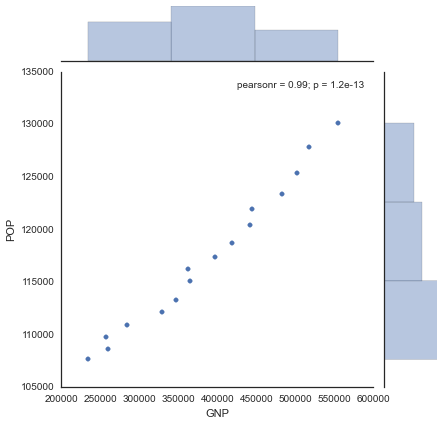

In [57]:
sns.jointplot("GNP", "POP", data=data)

It's because the two variables are highly correlated. t values and coefficients reported by a GLM model correspond only to the unique variance. Varaince shared by the independen variables are not assigned to any of them. Note however overall model performance ($R^2$) increased.

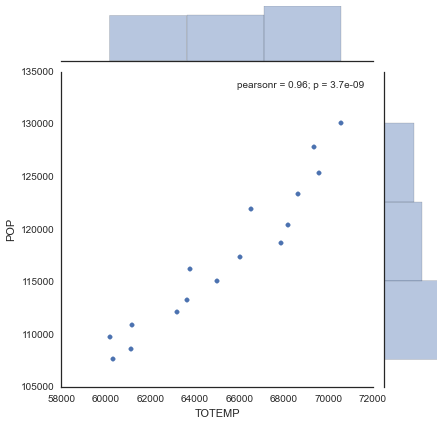

In [58]:
sns.jointplot("TOTEMP", "POP", data=data)

In [59]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["GNP"], data["POP"])

In [60]:
predicted = intercept+slope*data["GNP"]
data["POPwoGNP"] = data["POP"] - predicted

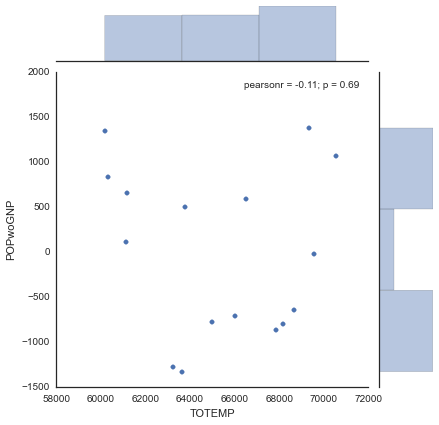

In [61]:
sns.jointplot("TOTEMP", "POPwoGNP", data=data)